In [1]:
unaccepted_cases = '{}/{}'.format(base_path,'ignore/part-00000-23693d72-7728-474b-9159-7170a0b4cd88-c000.csv')
pos_accepted_cases = '{}/{}'.format(base_path,'pos_accept/part-00000-af79f14d-80c8-4373-b156-ad7c22f80d0c-c000.csv')
neg_accepted_cases= '{}/{}'.format(base_path,'neg_accept/part-00000-25c30391-0c92-46e2-874d-f5efc69f7d09-c000.csv')


In [2]:
import pandas as pd
ua_cases_df = pd.read_csv(unaccepted_cases)
ua_cases_df.head()
#ua_cases_df['hour'].sum()

,_id,hour,week_day
0,T5O55O5455QGJ4LTP45055PG,16,Tue
1,T5O55O5455QGJ4LTP45055PG,16,Tue
2,T5O55O5455QGJ4LTP45055PG,16,Tue
3,T5O55O5455QGJ4LTP45055PG,16,Tue
4,T5O55O5455QGJ4TTP45055PJ,20,Sat


In [3]:
a_pos_df = pd.read_csv(pos_accepted_cases)
a_pos_df.head()

,_id,hour,week_day
0,55O5545T55QN44QTP40055P4,23,Sun
1,55O5545T55QT044TP4J055PG,3,Wed
2,55O5545T55QTN4GTP45055P5,3,Wed
3,55O5545T55QTQ4JTP4L055P0,2,Sun
4,55O5555455Q0440TP4L055PQ,20,Wed


In [4]:
a_neg_df = pd.read_csv(neg_accepted_cases)
a_neg_df.head()

,_id,hour,week_day
0,O5O55L5T55QQT45TP4L055PJ,5,Mon
1,O5O55L5T55QTN4JTP4L055PT,6,Tue
2,O5O55N5455Q0J4LTP4N055P4,3,Sun
3,O5O55N5455Q0J4LTP4N055P4,3,Sun
4,O5O55N5455Q0J4LTP4N055P4,3,Sun


In [24]:
ua_df = ua_cases_df[['_id','hour']]
ua_hour_count_df = ua_df.groupby('hour').size().reset_index(name='ua_count')
ua_hour_count_df.head()
#ua_hour_count_df['ua_count'].sum()

,hour,ua_count
0,0,65679
1,1,70060
2,2,75035
3,3,76969
4,4,76687


In [38]:
a_pos_df =a_pos_df[['_id','hour']]
a_pos_hour_count_df = a_pos_df.groupby('hour').size().reset_index(name='a_pos_count')
a_pos_hour_count_df.head()

,hour,a_pos_count
0,0,706
1,1,759
2,2,765
3,3,886
4,4,901


In [81]:
a_neg_df =a_neg_df[['_id','hour']]
a_neg_hour_count_df = a_neg_df.groupby('hour').size().reset_index(name='a_neg_count')
a_neg_hour_count_df.head()

,hour,a_neg_count
0,0,400
1,1,442
2,2,464
3,3,558
4,4,543


In [82]:
result_df = pd.concat([ua_hour_count_df,a_pos_hour_count_df,a_neg_hour_count_df], axis=1)
result_df = result_df[['hour','a_pos_count','a_neg_count','ua_count']]
result_df=result_df.T.drop_duplicates().T
result_df.head()

,hour,a_pos_count,a_neg_count,ua_count
0,0,706,400,65679
1,1,759,442,70060
2,2,765,464,75035
3,3,886,558,76969
4,4,901,543,76687


In [83]:
result_df['sum'] = result_df[['a_pos_count','a_neg_count','ua_count']].sum(axis=1)
#result_df.head()
result_df.head()

,hour,a_pos_count,a_neg_count,ua_count,sum
0,0,706,400,65679,66785
1,1,759,442,70060,71261
2,2,765,464,75035,76264
3,3,886,558,76969,78413
4,4,901,543,76687,78131


In [84]:
result_df['a_pos_perc']= round(result_df['a_pos_count']/result_df['sum'] * 100,4)
result_df['a_neg_perc']= round(result_df['a_neg_count']/result_df['sum'] * 100,4)
result_df['ua_perc']= round(result_df['ua_count']/result_df['sum'] * 100,4)

result_df= result_df[['hour','a_neg_perc','a_pos_perc','ua_perc','sum']]
result_df.head(20)

,hour,a_neg_perc,a_pos_perc,ua_perc,sum
0,0,0.5989,1.0571,98.3439,66785
1,1,0.6203,1.0651,98.3146,71261
2,2,0.6084,1.0031,98.3885,76264
3,3,0.7116,1.1299,98.1585,78413
4,4,0.6950,1.1532,98.1518,78131
5,5,0.6403,0.9841,98.3756,84338
6,6,0.6355,1.0903,98.2742,87495
7,7,0.6867,1.1360,98.1773,82132
8,8,0.7604,1.1054,98.1342,62602
9,9,0.7273,1.1073,98.1653,39735


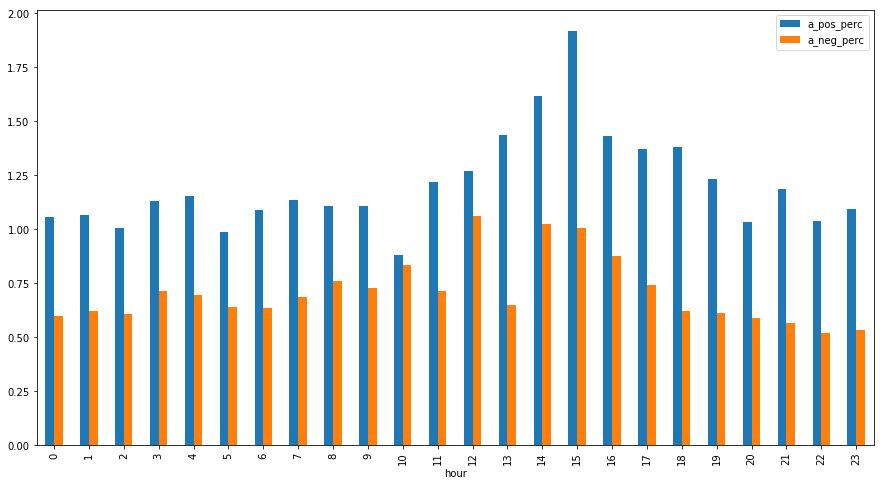

In [85]:
from matplotlib import pyplot as plt
ax = plt.gca()
result_df.plot(x="hour", y=['a_pos_perc','a_neg_perc'], kind="bar",ax=ax,figsize=(15,8))
#plt.rcParams["figure.figsize"] = (15,8)
plt.show()

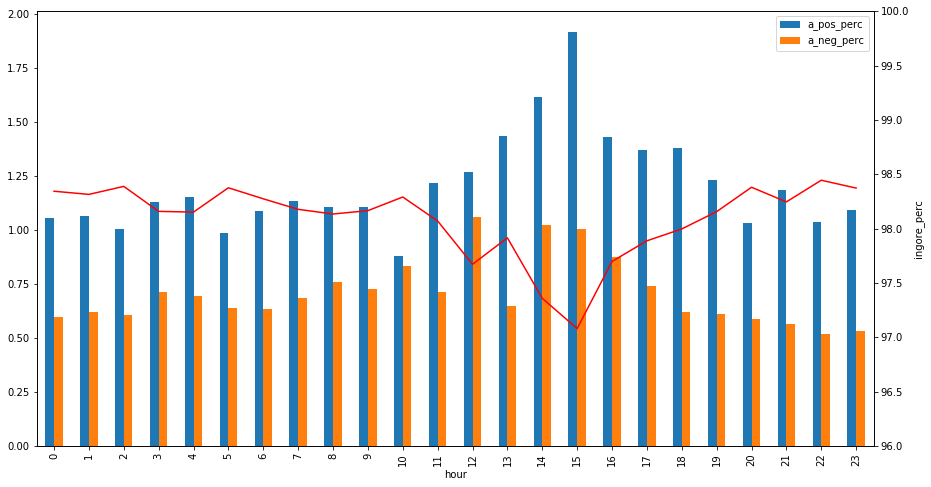

In [86]:
from numpy import array
import numpy as np
ax1 = plt.gca()
ind = result_df['ua_perc']
ind_arr =  array(ind)
ind = np.arange(len(ind)) 
ax1.set_xticks(ind)
result_df.plot(x="hour", y=['a_pos_perc','a_neg_perc'], kind="bar",ax=ax1,figsize=(15,8))
ax2 = ax1.twinx()
ax2.plot(ind, ind_arr, 'r-')
ax2.set_ylabel('ingore_perc')
ax2.set_ylim((96.0,100.0))
plt.show()

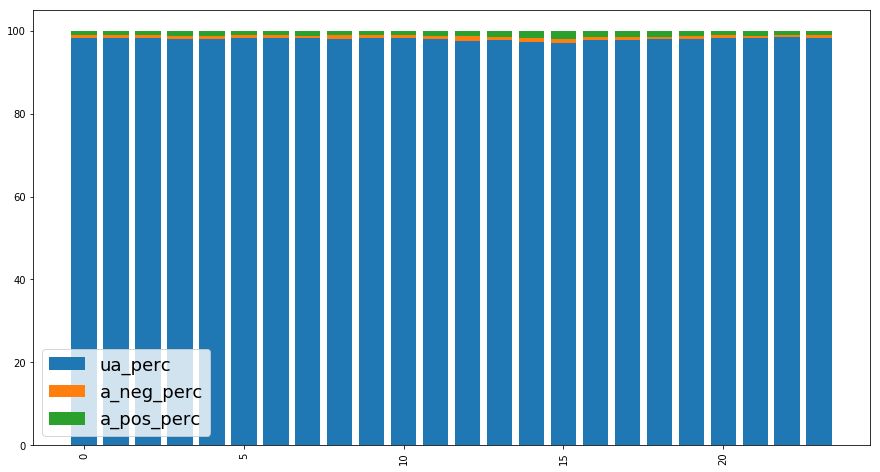

In [87]:
result_df_stack_bar = result_df[['hour','ua_perc','a_neg_perc','a_pos_perc']]
cumval=0
fig = plt.figure(figsize=(15,8))
for col in result_df_stack_bar.columns[~result_df_stack_bar.columns.isin(['hour'])]:
    plt.bar(result_df_stack_bar.hour, result_df_stack_bar[col], bottom=cumval, label=col)
    cumval = cumval+result_df_stack_bar[col]

_ = plt.xticks(rotation=90)
_ = plt.legend(fontsize=18)

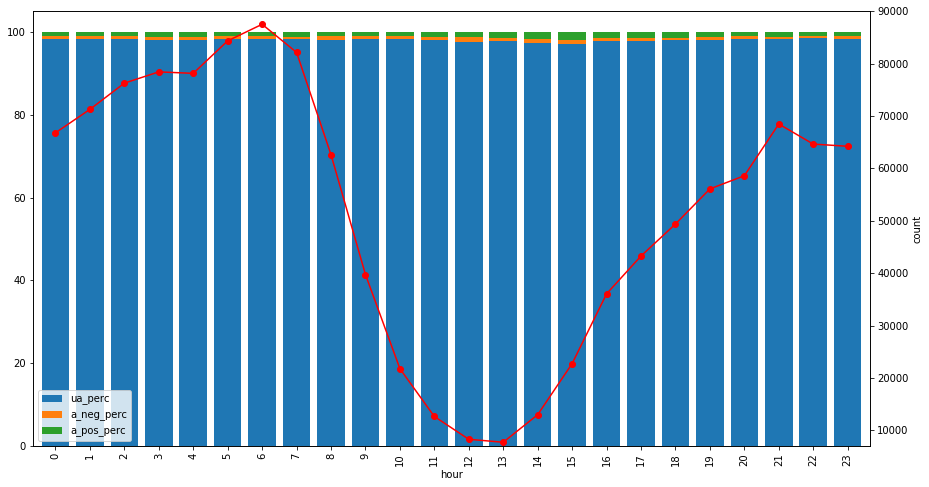

In [79]:
from numpy import array
import numpy as np
ax1 = plt.gca()
ind = result_df['sum']
ind_arr = array(ind)
ind = np.arange(len(ind)) 
ax1.set_xticks(ind)
result_df.plot(x="hour", y=['ua_perc','a_neg_perc','a_pos_perc'], kind="bar",stacked=True,ax=ax1,figsize=(15,8),width=0.8)
ax2 = ax1.twinx()
ax2.plot(ind, ind_arr, 'r--', linestyle='-', marker='o', color='red')
ax2.set_ylabel('count')
ax2.set_ylim((7000,90000))
plt.show()